In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
from matplotlib import pyplot as plt
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    diabetes.data, diabetes.target, random_state=0)

In [2]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.35666062386954533

In [4]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)


In [5]:
r

{'importances_mean': array([-0.00199267,  0.05587407,  0.17579   ,  0.08836513,  0.04221134,
         0.00203626,  0.00203754,  0.00318695,  0.20423412,  0.00278683]),
 'importances_std': array([0.00364661, 0.02319027, 0.04840377, 0.03283868, 0.03141263,
        0.00262197, 0.01309335, 0.00840218, 0.04964539, 0.00315827]),
 'importances': array([[-4.09597823e-03,  2.17374682e-03, -1.66394433e-03,
         -2.05083155e-03,  4.89653888e-03,  3.56132975e-03,
          3.22848739e-03,  1.24552252e-03, -1.91488457e-03,
         -4.91859136e-03,  6.07394399e-04, -6.42209760e-03,
         -3.43046470e-03, -1.95777409e-03,  3.18553464e-03,
         -7.34629267e-03, -2.81029527e-04, -1.21117435e-03,
         -3.96203704e-03, -6.65867489e-04, -1.06755975e-02,
         -3.22608545e-03, -5.08703509e-03, -5.53144146e-03,
          2.34616839e-03, -2.97842683e-03, -8.33660092e-03,
         -1.51655316e-03, -1.92957176e-03, -1.82240878e-03],
        [ 2.51752803e-02,  4.44001953e-02,  6.82602805e-02,

In [6]:
for i in r.importances_mean.argsort()[::-1]:
    print(f"{diabetes.feature_names[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023
s1      0.042 +/- 0.031
s4      0.003 +/- 0.008
s6      0.003 +/- 0.003
s3      0.002 +/- 0.013
s2      0.002 +/- 0.003
age     -0.002 +/- 0.004


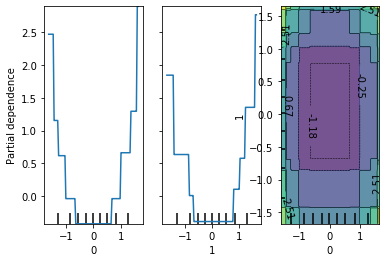

In [7]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
plot_partial_dependence(clf, X, features) 

sklearn.inspection._partial_dependence.PartialDependenceDisplay

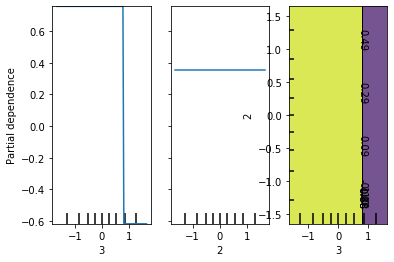

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
type(plot_partial_dependence(mc_clf, X, features, target=0))

In [9]:
from sklearn.inspection import partial_dependence

pdp, axes = partial_dependence(clf, X, [0])
pdp

axes

[array([-1.62497055, -1.59201391, -1.55905727, -1.52610063, -1.493144  ,
        -1.46018736, -1.42723072, -1.39427408, -1.36131745, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653426, -1.16357762,
        -1.13062098, -1.09766434, -1.06470771, -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627141, -0.60331478, -0.57035814, -0.5374015 , -0.50444486,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966167,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783512, -0.17487849,
        -0.14192185, -0.10896521, -0.07600857, -0.04305193, -0.0100953 ,
         0.02286134,  0.05581798,  0.08877462,  0.12173126,  0.15468789,
         0.18764453,  0.22060117,  0.25355781,  0.28651444,  0.31947108,
         0.35242772,  0.38538436,  0.418341  ,  0.45129763,  0.48425427,
         0.51721091,  0.55016755,  0.58312418,  0.6

In [15]:
import numpy as np
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}

In [18]:
help(X_val.reshape)

Help on built-in function reshape:

reshape(...) method of numpy.ndarray instance
    a.reshape(shape, order='C')
    
    Returns an array containing the same data with a new shape.
    
    Refer to `numpy.reshape` for full documentation.
    
    See Also
    --------
    numpy.reshape : equivalent function
    
    Notes
    -----
    Unlike the free function `numpy.reshape`, this method on `ndarray` allows
    the elements of the shape parameter to be passed in as separate arguments.
    For example, ``a.reshape(10, 11)`` is equivalent to
    ``a.reshape((10, 11))``.



In [24]:
X_val.reshape(1,-1)

array([[ 0.01991321,  0.05068012,  0.10480869, ..., -0.00259226,
         0.03119299,  0.00720652]])

In [20]:
X_val

array([[ 0.01991321,  0.05068012,  0.10480869, ..., -0.00259226,
         0.00371174,  0.04034337],
       [-0.01277963, -0.04464164,  0.06061839, ...,  0.03430886,
         0.0702113 ,  0.00720652],
       [ 0.03807591,  0.05068012,  0.00888341, ..., -0.00259226,
        -0.01811827,  0.00720652],
       ...,
       [-0.0854304 , -0.04464164, -0.00405033, ..., -0.03949338,
        -0.0611766 , -0.01350402],
       [ 0.03807591,  0.05068012, -0.02991782, ..., -0.00259226,
        -0.01290794,  0.00306441],
       [ 0.04170844,  0.05068012,  0.01966154, ..., -0.00259226,
         0.03119299,  0.00720652]])

In [23]:
np.reshape(X_val,(1,-1))

array([[ 0.01991321,  0.05068012,  0.10480869, ..., -0.00259226,
         0.03119299,  0.00720652]])